<a href="https://colab.research.google.com/github/Jarvis-BITS/midodrine-mimic-iv/blob/main/notebook/04_tableone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
!pip install tableone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tableone import TableOne
from sklearn.linear_model import LogisticRegression as lr
import seaborn as sns
sns.set(rc={'figure.figsize':(16,10)}, font_scale=1.3)

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
cohort_table = pd.read_csv('table_cohort.csv')

In [ ]:
cohort_table

,stay_id,hadm_id,subject_id,age,Gender,ethnicity,midodrine,avg_doses_per_24_hrs,MICU,icu_intime,...,dbp_mean,mbp_mean,resp_rate_mean,temperature_mean,spo2_mean,glucose_mean,sedative_use,ventilation_use,mort_28_day,admit_hour
0,36014877,27162817,11861017,87,0,WHITE,1,1.605166,0,2189-03-15 15:48:40,...,64.691426,79.174745,22.680266,37.116512,99.571549,179.721983,1.0,1.0,0,15
1,32272859,25963696,11259141,60,1,WHITE,1,1.594406,0,2184-07-10 18:39:19,...,71.675633,81.397152,21.641196,37.124694,97.346535,124.652542,1.0,1.0,0,18
2,37039117,21396430,10184327,89,0,WHITE,1,1.087500,1,2138-10-20 20:25:00,...,61.787234,74.797872,19.133197,37.195846,97.771028,193.470588,1.0,1.0,1,20
3,34023828,21782431,18010960,59,0,UNKNOWN,1,1.719512,0,2167-04-26 15:52:00,...,64.720982,84.488839,17.865471,37.258167,96.552809,117.967033,1.0,1.0,0,15
4,32309766,29272306,15703353,59,1,WHITE,1,1.523810,0,2181-05-18 03:10:39,...,57.630303,75.487654,20.508824,37.435862,97.309942,188.555556,1.0,1.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8669,39690469,21320524,18098524,89,1,WHITE,0,1.644444,1,2120-10-30 21:30:12,...,52.400000,63.692308,27.923077,36.654118,96.353846,100.250000,0.0,1.0,0,21
8670,39696826,24727163,10070932,37,1,WHITE,0,1.571429,1,2146-05-11 20:27:00,...,59.596154,68.250000,20.684211,38.076923,97.342105,111.500000,0.0,NaN,0,20
8671,39801252,24096764,16749537,76,0,WHITE,0,1.389831,1,2127-09-10 00:31:00,...,56.677966,73.906780,16.704545,36.961538,97.558140,179.181818,1.0,1.0,0,0
8672,39838873,20342520,15554479,49,0,ASIAN,0,1.550000,1,2183-03-26 10:18:00,...,72.911765,80.352941,24.054054,36.185556,97.702703,124.000000,0.0,NaN,0,10


In [ ]:
cohort_table.columns

Index(['stay_id', 'hadm_id', 'subject_id', 'age', 'Gender', 'ethnicity',
       'midodrine', 'avg_doses_per_24_hrs', 'MICU', 'icu_intime',
       'adm_weekday', 'weight', 'sapsii', 'sirs', 'sofa_avg_24hrs',
       'charlson_index', 'CPD_or_COPD', 'Maligancy', 'mild_liver',
       'severe_liver', 'Renal', 'aids', 'CAD_rate', 'AFIB_rate', 'hemoglobin',
       'platelet', 'wbc', 'sodium', 'potassium', 'bicarbonate', 'chloride',
       'bun', 'creatinine', 'lactate', 'ph', 'po2', 'pco2', 'bnp', 'troponin',
       'creatinine_kinase', 'heart_rate_mean', 'sbp_mean', 'dbp_mean',
       'mbp_mean', 'resp_rate_mean', 'temperature_mean', 'spo2_mean',
       'glucose_mean', 'sedative_use', 'ventilation_use', 'mort_28_day',
       'admit_hour'],
      dtype='object')

## Creating Population Table
Tom J Pollard, Alistair E W Johnson, Jesse D Raffa, Roger G Mark; tableone: An open source Python package for producing summary statistics for research papers, JAMIA Open, https://doi.org/10.1093/jamiaopen/ooy012

In [13]:
table_columns = ['midodrine', 'age', 'Gender', 'MICU', 'weight',
       'sapsii', 'sirs', 'sofa_avg_24hrs', 'charlson_index', 'CPD_or_COPD', 'Maligancy',
      'severe_liver', 'Renal', 'aids', 'CAD_rate',
       'AFIB_rate', 'hemoglobin', 'platelet', 'wbc', 'sodium', 'potassium',
       'bicarbonate', 'chloride', 'bun', 'creatinine', 'lactate', 'ph', 'po2',
       'pco2', 'bnp', 'troponin', 'creatinine_kinase', 'heart_rate_mean',
       'sbp_mean', 'dbp_mean', 'mbp_mean', 'resp_rate_mean',
       'temperature_mean', 'spo2_mean', 'glucose_mean', 'sedative_use', 
       'ventilation_use', 'mort_28_day', 'adm_weekday', 'ethnicity']

table_categorical = ['Gender', 'ethnicity', 'adm_weekday', 'MICU','CPD_or_COPD', 'Maligancy',
       'severe_liver', 'Renal', 'aids', 'CAD_rate',
       'AFIB_rate', 'sedative_use', 'ventilation_use']

table_groupby = 'midodrine'

table_nonnormal = ['age', 'weight']

labels={'mort_28_day': 'mortality', 'sofa_avg_24hrs' : 'SOFA score', 'sapsii' : 'SAPS 2 score', 'heart_rate_mean' : 'heart_rate', 'temperature_mean' : 'temperature'}

decimals = {"age": 0}

order = {"ethnicity": ["WHITE", "BLACK/AFRICAN AMERICAN", "HISPANIC/LATINO", "ASIAN", "AMERICAN INDIAN/ALASKA NATIVE", "UNKNOWN", "UNABLE TO OBTAIN", "OTHER"]}

In [14]:
mytable = TableOne(cohort_table, columns=table_columns, categorical=table_categorical, groupby=table_groupby, nonnormal=table_nonnormal, rename=labels, order = order, decimals=decimals, pval=True, smd=True, dip_test=True, normal_test=True, tukey_test=True)

In [15]:
mytable

Grouped by midodrine                                                                         
                                                                        Missing           Overall                 0                  1 P-Value SMD (0,1)
n                                                                                            8674              7820                854                  
age, median [Q1,Q3]                                                           0        67 [56,77]        67 [56,78]         64 [55,73]  <0.001    -0.110
Gender, n (%)                0                                                0       4789 (55.2)       4303 (55.0)         486 (56.9)   0.310     0.038
                             1                                                        3885 (44.8)       3517 (45.0)         368 (43.1)                  
MICU, n (%)                  0                                                0       3223 (37.2)       2922 (37.4)         301 (35.2)   0.238     0.044
                             1                                                        5451 (62.8)       4898 (62.6)         553 (64.8)                  
weight, median [Q1,Q3]                                                      176  78.0 [65.4,95.0]  78.0 [65.1,94.2]  80.0 [67.4,100.0]   0.002     0.106
SAPS 2 score, mean (SD)                                                       0       44.5 (14.7)       44.3 (14.7)        46.1 (13.8)  <0.001     0.126
sirs, mean (SD)                                                               0         3.0 (0.9)         3.0 (0.8)          2.8 (0.9)  <0.001    -0.268
SOFA score, mean (SD)                                                         0         6.3 (3.0)         6.1 (2.9)          8.1 (3.4)  <0.001     0.615
charlson_index, mean (SD)                                                     0         6.2 (3.0)         6.0 (3.0)          7.2 (2.9)  <0.001     0.405
CPD_or_COPD, n (%)           0.0                                              0       6191 (71.4)       5563 (71.1)         628 (73.5)   0.152     0.054
                             1.0                                                      2483 (28.6)       2257 (28.9)         226 (26.5)                  
Maligancy, n (%)             0.0                                              0       7168 (82.6)       6448 (82.5)         720 (84.3)   0.190     0.050
                             1.0                                                      1506 (17.4)       1372 (17.5)         134 (15.7)                  
severe_liver, n (%)          0.0                                              0       7794 (89.9)       7238 (92.6)         556 (65.1)  <0.001     0.714
                             1.0                                                       880 (10.1)         582 (7.4)         298 (34.9)                  
Renal, n (%)                 0.0                                              0       6544 (75.4)       6041 (77.3)         503 (58.9)  <0.001     0.402
                             1.0                                                      2130 (24.6)       1779 (22.7)         351 (41.1)                  
aids, n (%)                  0.0                                              0       8574 (98.8)       7735 (98.9)         839 (98.2)   0.116     0.057
                             1.0                                                        100 (1.2)          85 (1.1)           15 (1.8)                  
CAD_rate, n (%)              0.0                                              0       6808 (78.5)       6159 (78.8)         649 (76.0)   0.068     0.066
                             1.0                                                      1866 (21.5)       1661 (21.2)         205 (24.0)                  
AFIB_rate, n (%)             0.0                                              0       5888 (67.9)       5362 (68.6)         526 (61.6)  <0.001     0.147
                             1.0                                                 

In [16]:
print(mytable.tabulate(tablefmt = "fancy_grid"))

╒══════════════════════════════╤═══════════════════════════════╤═══════════╤══════════════════╤══════════════════╤═══════════════════╤═══════════╤═════════════╕
│                              │                               │ Missing   │ Overall          │ 0                │ 1                 │ P-Value   │ SMD (0,1)   │
╞══════════════════════════════╪═══════════════════════════════╪═══════════╪══════════════════╪══════════════════╪═══════════════════╪═══════════╪═════════════╡
│ n                            │                               │           │ 8674             │ 7820             │ 854               │           │             │
├──────────────────────────────┼───────────────────────────────┼───────────┼──────────────────┼──────────────────┼───────────────────┼───────────┼─────────────┤
│ age, median [Q1,Q3]          │                               │ 0         │ 67 [56,77]       │ 67 [56,78]       │ 64 [55,73]        │ <0.001    │ -0.110      │
├──────────────────────────────┼──

In [17]:
mytable.to_excel('table.xlsx')

In [ ]:
features_complete = pd.read_csv('features_complete.csv')
features_complete = features_complete.iloc[:,1:] #dropping 0th index column (redundant)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f496ccc1190>]],
      dtype=object)

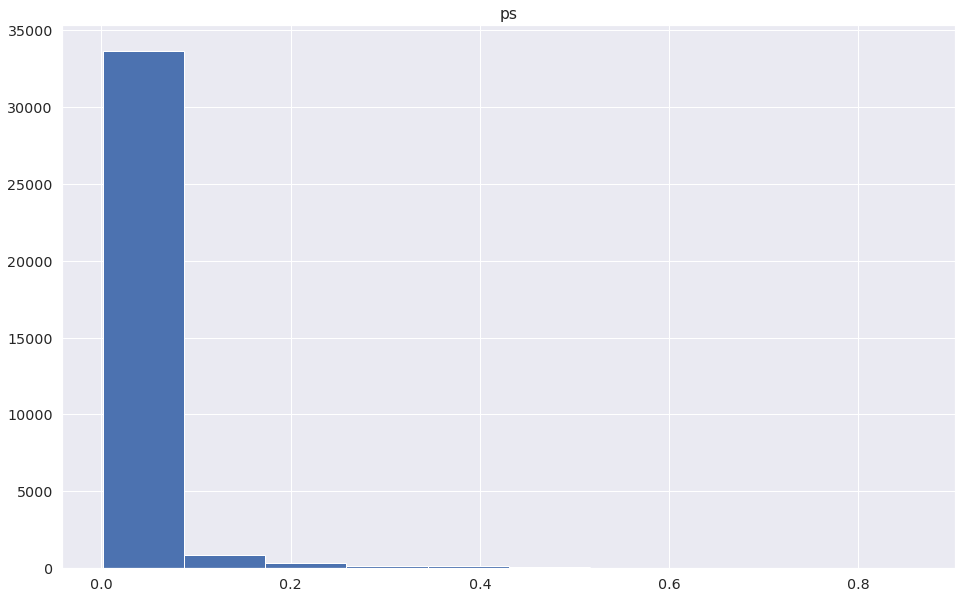

In [ ]:
features_complete.hist("ps")

In [ ]:
weighted_cohort_id = pd.read_csv('weighted_cohort_id.csv')

In [ ]:
weighted_cohort_id = weighted_cohort_id['stay_id'].tolist()

In [ ]:
weighted_cohort_id = weighted_cohort_id.sort()

In [ ]:
weighted_cohort = cohort_table[cohort_table.index.isin(weighted_cohort_id)]

In [ ]:
weighted_cohort

,stay_id,hadm_id,subject_id,age,Gender,ethnicity,midodrine,avg_doses_per_24_hrs,MICU,adm_weekday,...,resp_rate_mean,temperature_mean,spo2_mean,glucose_mean,sedative_use,ventilation_use,vasopressor_use,mortality,mort_28_day,admit_hour
1,32272859,25963696,11259141,60,1,WHITE,1,1.633333,0.0,7.0,...,17.333333,36.898333,97.259259,120.200000,1.0,1.0,1.0,0.0,0.0,18.0
2,34023828,21782431,18010960,59,0,UNKNOWN,1,1.589041,0.0,1.0,...,15.392857,36.786667,96.629630,98.000000,1.0,1.0,1.0,0.0,0.0,15.0
3,37798199,29764966,10926537,42,1,BLACK/AFRICAN AMERICAN,1,1.568627,0.0,7.0,...,17.240000,37.142857,99.791667,95.000000,1.0,1.0,1.0,0.0,0.0,17.0
4,32309766,29272306,15703353,59,1,WHITE,1,1.517241,0.0,6.0,...,21.740741,37.372000,98.178571,136.800000,1.0,1.0,1.0,0.0,0.0,3.0
5,32470068,29923619,12682108,32,1,WHITE,1,1.666667,0.0,3.0,...,16.187500,36.743750,97.437500,137.500000,0.0,1.0,1.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21146,37931684,23401888,16917096,76,0,WHITE,0,1.793103,0.0,1.0,...,14.548387,36.805000,98.225806,108.500000,0.0,1.0,1.0,1.0,0.0,21.0
21302,39661672,29736871,11343484,71,0,WHITE,0,1.515464,0.0,4.0,...,17.750000,36.823333,95.071429,142.500000,1.0,1.0,1.0,0.0,0.0,16.0
21328,39943884,24720945,16533974,63,0,UNKNOWN,0,1.500000,0.0,6.0,...,16.000000,35.560000,98.666667,NaN,1.0,NaN,1.0,1.0,0.0,22.0
21418,30827926,24899138,10570405,32,1,WHITE,0,1.375000,0.0,7.0,...,18.653846,36.798000,96.884615,94.750000,0.0,NaN,1.0,0.0,0.0,13.0


In [ ]:
mytable_weighted = TableOne(weighted_cohort, columns=table_columns, categorical=table_categorical, groupby=table_groupby, nonnormal=table_nonnormal, pval=True)

In [ ]:
print(mytable_weighted.tabulate(tablefmt = "fancy_grid"))

╒════════════════════════════════╤═══════════════════════════════╤═══════════╤══════════════════╤══════════════════╤══════════════════╤═══════════╕
│                                │                               │ Missing   │ Overall          │ 0                │ 1                │ P-Value   │
╞════════════════════════════════╪═══════════════════════════════╪═══════════╪══════════════════╪══════════════════╪══════════════════╪═══════════╡
│ n                              │                               │           │ 881              │ 368              │ 513              │           │
├────────────────────────────────┼───────────────────────────────┼───────────┼──────────────────┼──────────────────┼──────────────────┼───────────┤
│ age, median [Q1,Q3]            │                               │ 0         │ 63.0 [51.0,76.0] │ 63.0 [49.8,78.0] │ 64.0 [53.0,74.0] │ 0.683     │
├────────────────────────────────┼───────────────────────────────┼───────────┼──────────────────┼───────────────